In [1]:
import SimpleITK as sitk
import numpy as np
import sys
sys.path.append('../../')

from scripts.Registration3D.registration import central_normalize_img, calculate_ct2us_transform

%load_ext autoreload

%autoreload 2

In [11]:
def flip_img(input_img,orders):
    flipped_ct = sitk.Flip(input_img,orders)
    flipped_ct = sitk.GetImageFromArray(sitk.GetArrayFromImage(flipped_ct).astype(np.float64))
    flipped_ct.SetOrigin(input_img.GetOrigin())
    flipped_ct.SetSpacing(input_img.GetSpacing())
    return flipped_ct

original_vessel_ct = sitk.ReadImage('vessel_ct.nii.gz')
# The left-right order is different between the US image and CT image. We flip vessel_ct to make them consistent.
original_vessel_ct = flip_img(original_vessel_ct,[True,False,False])
vessel_ct = central_normalize_img(original_vessel_ct,150)



original_vessel_us = sitk.ReadImage('vessel_us.nii.gz')
vessel_us = central_normalize_img(original_vessel_us,150)

CT2US = calculate_ct2us_transform(vessel_us,vessel_ct)

Start optimizing the transformation


100%|██████████| 10/10 [00:33<00:00,  3.37s/it]


# Visualize registration result

In [8]:
import cv2
import pickle as pkl
from cv2 import cvtColor

def to_grayscale(img):
    original_shape = img.shape[:2]
    img = cvtColor(img,cv2.COLOR_BGR2GRAY).astype(float)
    img /= np.max(img)
    return img
body_ct = sitk.ReadImage('CT_phantom_regular.nii.gz')
body_ct = flip_img(body_ct,[True,False,False])

body_ct = sitk.ReadImage('CT_phantom_regular.nii.gz')
body_ct = flip_img(body_ct,[True,False,False])


with open('registration_3d_frames.pkl','rb') as fp:
    data = pkl.load(fp)
    
frames,waypoints = data['frames'], data['waypoints']
for i in range(len(frames)):
    frames[i] = to_grayscale(frames[i])
body_us = sitk.GetImageFromArray(frames)

1.0 0.0


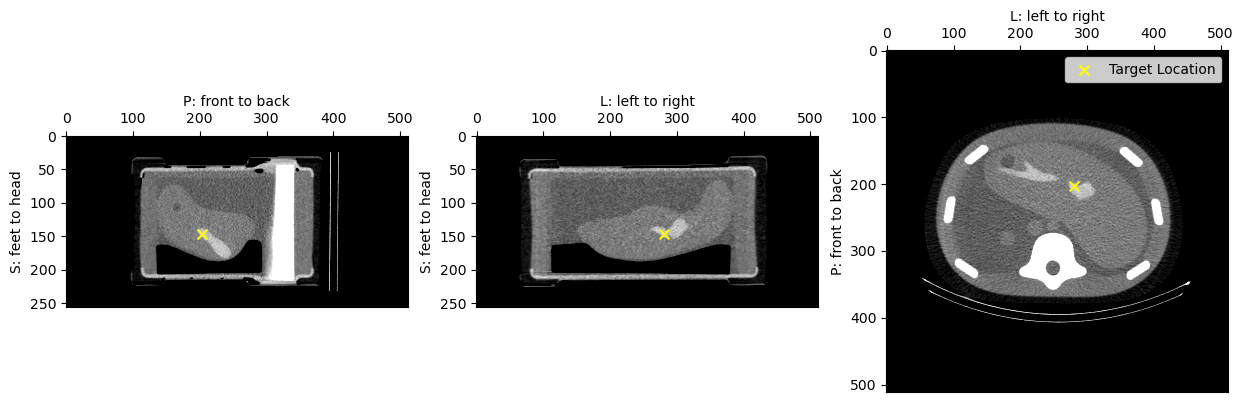

Ultrasound
1.0 0.0


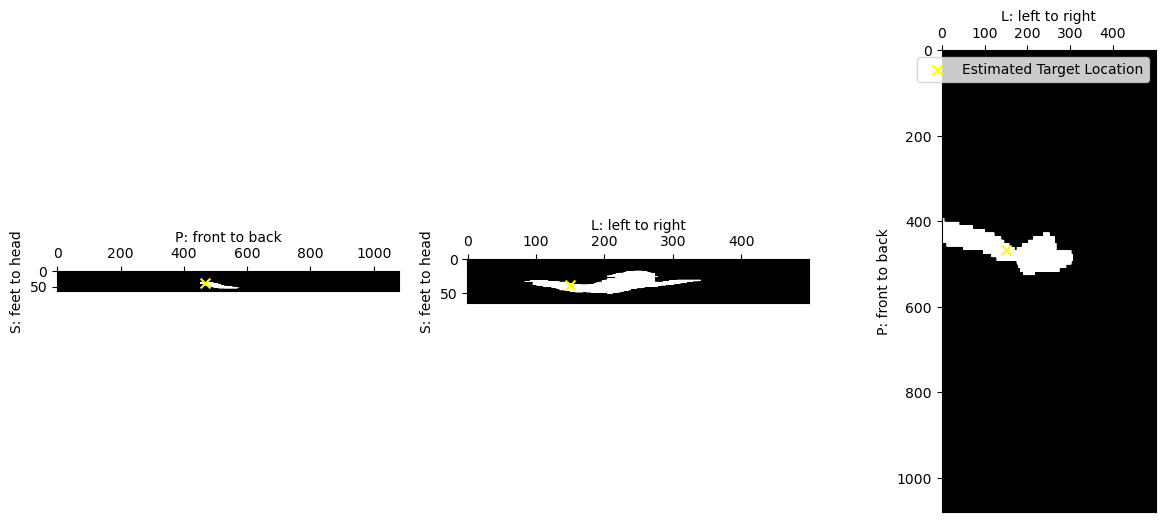

1.0 0.0


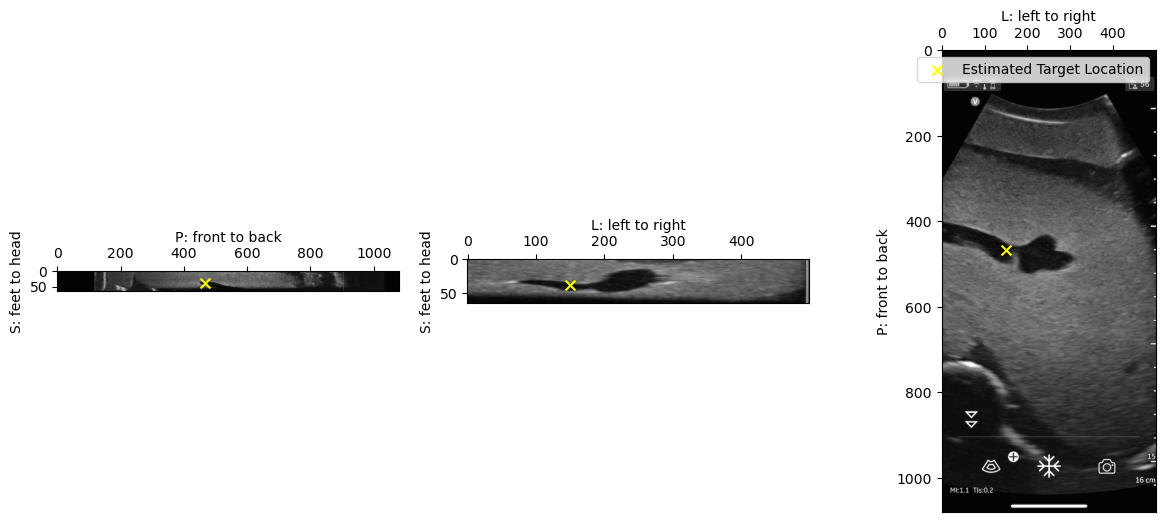

1.0 0.0


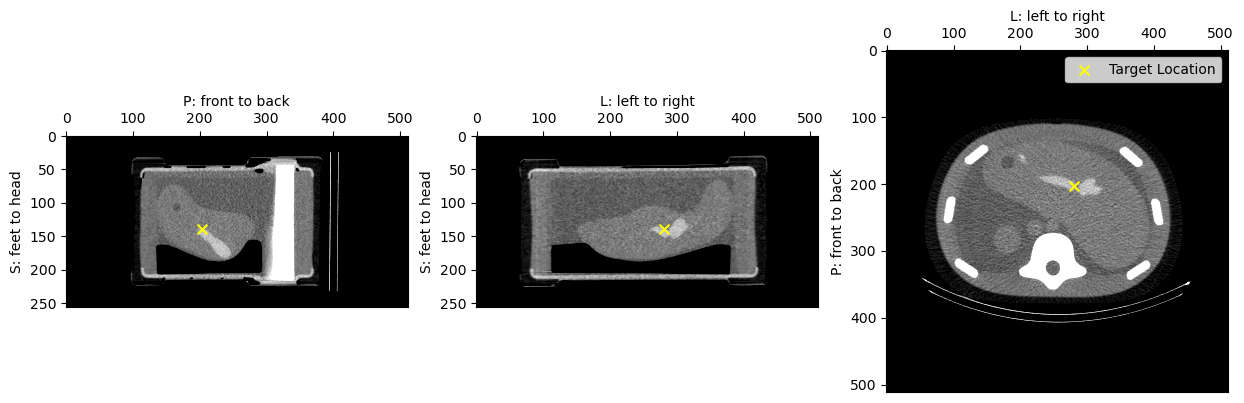

Ultrasound
1.0 0.0


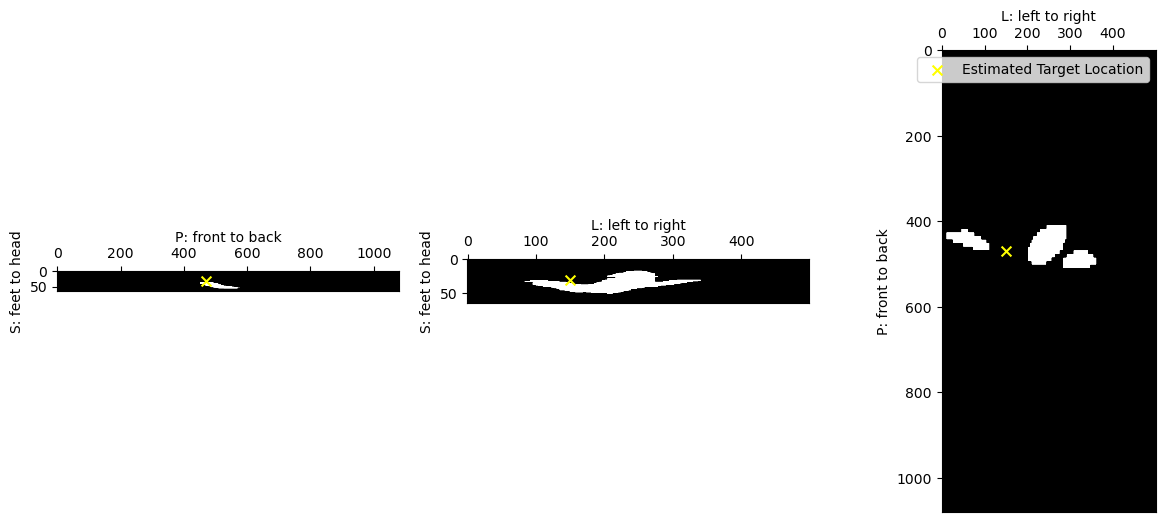

1.0 0.0


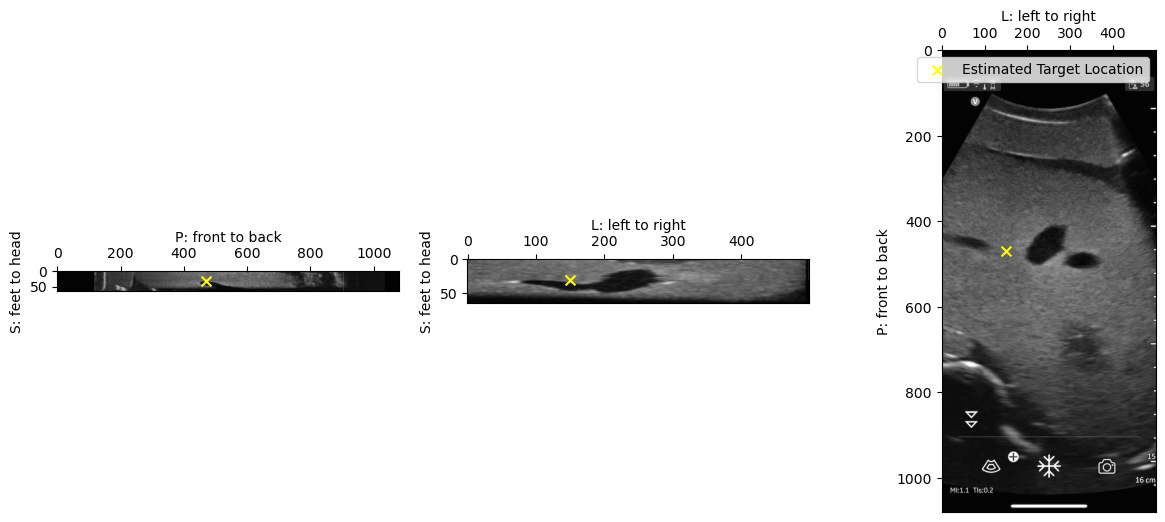

In [10]:
from scripts.Registration3D.registration import visualize_vessel,get_centroid_loc

target_locs = [
                get_centroid_loc(original_vessel_ct) + np.array([0,0,5]),
                get_centroid_loc(original_vessel_ct) + np.array([0,0,0]),
               ]



for loc in target_locs:
    pix = original_vessel_ct.TransformPhysicalPointToIndex(loc)
    # visualize_vessel(original_vessel_ct,pix,'Target Location')
    visualize_vessel(body_ct,pix,'Target Location',vmin=0.6,vmax=0.8)

    target_loc_us = CT2US.TransformPoint(loc)
    
    pix = original_vessel_us.TransformPhysicalPointToIndex(target_loc_us)
    print("Ultrasound")
    visualize_vessel(original_vessel_us,pix,'Estimated Target Location')
    visualize_vessel(body_us,pix,'Estimated Target Location',vmin=0.0,vmax=1.0)

